# Objective: Artificial Neural Network Regression for Trigonometry Functions
Here, I'm going to build an aritifical neural network regression model using PyTorch to recreate a combination of trigonometric functions. To do this, we are creating a synthetic data set.

## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Create Data
This covers how we can synthetically create data from a combination of trigonometric functions.

In [5]:
# create dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3        # X will create a plane [-3, +3) X [-3, +3)
y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

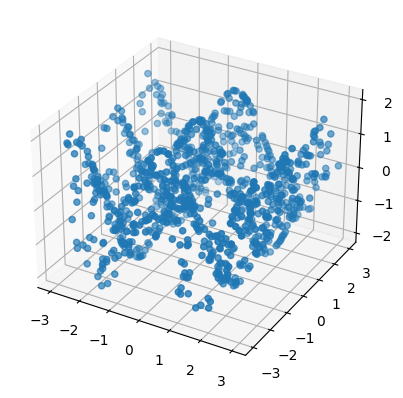

In [6]:
# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

## Preprocess Data
This covers how to prepare data for training.

In [10]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))

## Build Model
This covers how to build a artificial neural network regression model using the synthetic data from trigonometric functions.

In [7]:
# build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [8]:
# loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Training
This covers how to train the artificial neural network regression model with the input data that we created.

In [11]:
# train policy in a function
def gradient_descent(model, criterion, optimizer, X_train, y_train, epochs=1000):
    # create a container to store losses
    train_losses = np.zeros(epochs)
    
    # training
    for epoch in range(epochs):
        # zero the parameter gradients to make sure they are zero
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(X_train)
        loss = criterion(y_train, outputs)
        
        # backward and optimize
        loss.backward()
        optimizer.step()
        
        # save losses
        train_losses[epoch] = loss.item()
        
        # print out the training progress
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}")
    
    return train_losses

In [12]:
# actual training
train_losses = gradient_descent(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.7177
Epoch 100/1000, Train Loss: 0.2495
Epoch 150/1000, Train Loss: 0.0970
Epoch 200/1000, Train Loss: 0.0392
Epoch 250/1000, Train Loss: 0.0122
Epoch 300/1000, Train Loss: 0.0065
Epoch 350/1000, Train Loss: 0.0056
Epoch 400/1000, Train Loss: 0.0035
Epoch 450/1000, Train Loss: 0.0038
Epoch 500/1000, Train Loss: 0.0027
Epoch 550/1000, Train Loss: 0.0076
Epoch 600/1000, Train Loss: 0.0023
Epoch 650/1000, Train Loss: 0.0150
Epoch 700/1000, Train Loss: 0.0020
Epoch 750/1000, Train Loss: 0.0019
Epoch 800/1000, Train Loss: 0.0028
Epoch 850/1000, Train Loss: 0.0017
Epoch 900/1000, Train Loss: 0.0017
Epoch 950/1000, Train Loss: 0.0133
Epoch 1000/1000, Train Loss: 0.0016


## Result
This shows the result of the artificial neural network regression model by showing the loss evolution. Then we can make predictions out of the trained model and display on a plot.

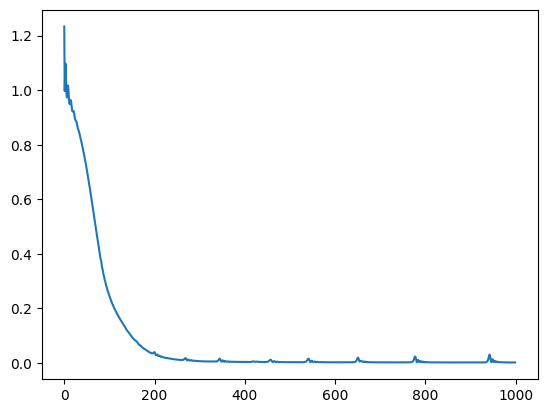

In [13]:
# plot the losses
plt.plot(train_losses)